# Pittsburgh's Happiest Neighborhood

**Team Name:** Xenotek

**Team Members:** Julian Reinstein, Gad Yava, Sumukh Desabhotla

**Email Addresses:** jer323@pitt.eduk, gsy8@pitt.edu, and sud68@pitt.edu

**Dataset 1:** [Parks](https://data.wprdc.org/dataset/parks/resource/fa329e3d-89ff-4708-8ddf-81bfedcad11d)

**Dataset 1 Description:** This dataset lists all of the parks in Pittsburgh and lists where they are.

**Dataset 2:** [Traffic](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh/resource/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167)
Dataset 2 Description: This dataset records the number of cars counted in each neighborhood of Pittsburgh.<br />

**Dataset 3:** https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f<br />

**Dataset 3 Description:** This dataset includes descriptions of thousands of arrests around Pittsburgh, including the neighborhoods in which they occurred.<br />

It's a beautiful day in the neighborhood! This project will determine Pittsburgh's Happiest Neighborhood through three metrics: parks, traffic, and crime. The neighborhood with the highest number of parks per neighborhood, fewest cars per neighborhood, and lowest crime per total population will be the "Happiest Neighborhood" in Pittsburgh.

![misterrogers](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExYmRlZHc4b2ozeXY3N3ZmNHdtemlxcm1zZjJyMDBuZnR4M3FsODllbyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/ujGEpQsg6HSzWzDd9a/giphy.webp)

In [11]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

## Metric #1: Parks

### Gad Yava

In this cell below, we read the Parks.csv file and then filtered the data to only show parks (the dataset had other things that weren't parks). Then we grouped the neighborhood by the number of times it shows up.<br> It was possible to do it by making a query mask which rejected the types that weren't really parks.

In [12]:
#read parks
parks = pd.read_csv("Parks.csv")

#filter so it is only "parks", data marked street poles as parks
park_mask = parks["type"] != "Traffic Island/Median"
actual_parks = parks[park_mask]
#print(actual_parks)

#actual_parks.info()
#groups by the neighborhood's amount said
actual_parks = actual_parks.groupby("neighborhood").count()


#makes a neighborhood column since I grouped it by neighborhood, it used it as the index
actual_parks["neighborhood_column"] = actual_parks.index

print(actual_parks.head(71))

                     _id  id  name  type  maintenance_responsibility  image  \
neighborhood                                                                  
Allegheny Center       2   2     2     2                           2      0   
Allentown              2   2     2     2                           2      0   
Arlington              1   1     1     1                           1      0   
Banksville             2   2     2     2                           2      0   
Bedford Dwellings      1   1     1     1                           1      0   
...                  ...  ..   ...   ...                         ...    ...   
Upper Hill             1   1     1     1                           1      1   
Upper Lawrenceville    3   3     3     3                           3      2   
West End               2   2     2     2                           2      0   
West Oakland           1   1     1     1                           1      0   
Westwood               2   2     2     2            

### Now, we will filter the data so we only get the neighborhoods and IDs.<br>  The Values are sorted by how many parks a neiborhood had and the name.

In [56]:
park_2 = actual_parks[["neighborhood_column","_id"]] #gets neighborhood and id
park_2 = park_2.sort_values(by = "_id",ascending=False)
print(park_2.head(60))

                                 neighborhood_column  _id
neighborhood                                             
Beechview                                  Beechview    7
South Side Slopes                  South Side Slopes    7
Mount Washington                    Mount Washington    6
Hazelwood                                  Hazelwood    6
South Side Flats                    South Side Flats    6
Sheraden                                    Sheraden    6
Troy Hill                                  Troy Hill    5
Central Business District  Central Business District    5
East Liberty                            East Liberty    4
Squirrel Hill South              Squirrel Hill South    4
Marshall-Shadeland                Marshall-Shadeland    4
Elliott                                      Elliott    4
Brighton Heights                    Brighton Heights    4
South Oakland                          South Oakland    3
Spring Hill-City View          Spring Hill-City View    3
Garfield      

### Now, we will combine put the data into a map.<br>
### Read the neighborhood file which had the map, then merged park_2 into the map.<br> 
### The map's hood is the neighborhood while the id is the park amount.

In [49]:
#merges neighborhood with park and makes park_map
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot()
park_map = neighborhoods.merge(park_2, left_on='hood', right_on = "neighborhood_column")
park_map[["hood", "_id" ,"geometry"]]

,hood,_id,geometry
0,Central Oakland,2,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,West Oakland,1,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
2,Crawford-Roberts,3,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
3,Strip District,2,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
4,Central Business District,5,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
...,...,...,...
67,Middle Hill,1,"MULTIPOLYGON (((-79.97980 40.44761, -79.97979 ..."
68,Esplen,1,"POLYGON ((-80.05154 40.46364, -80.05140 40.463..."
69,Fairywood,1,"POLYGON ((-80.08804 40.45975, -80.08803 40.459..."
70,West End,2,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."


### This step is part of the one above since we're just ploting it. But we also customized the data so it can be seen well.

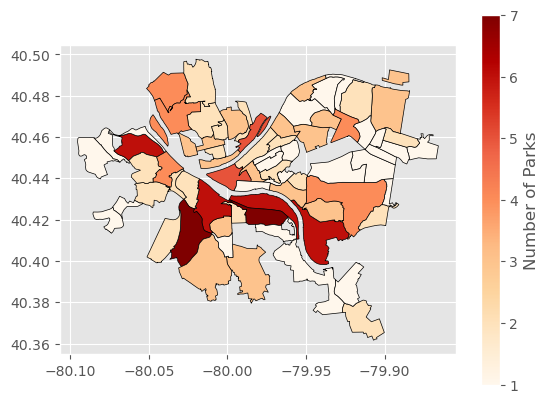

In [36]:
park_map.plot(column = "_id",
              cmap='OrRd',              # choose a color palette
              edgecolor="black",        # outline the districts in white
              legend=True,              # show the legend
              legend_kwds={'label': "Number of Parks"}, # label the legend
                       # set the size
              missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
             )
plt.show()

### Now, let's put the top 10 neighborhoods into a bar graph. This will help us visualize the raw data.

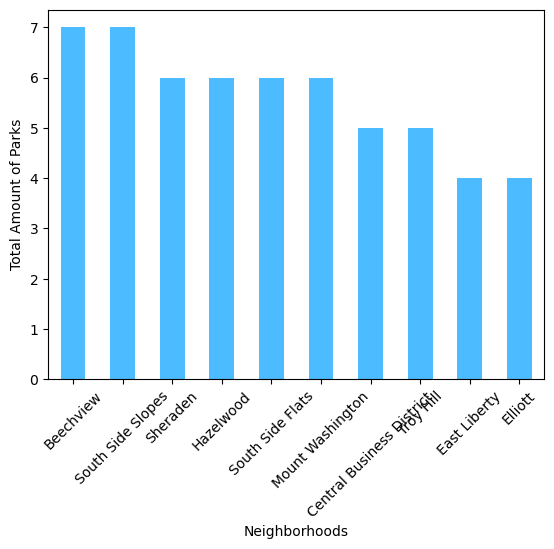

In [16]:
bar = park_map.sort_values(by="_id", ascending=False).head(10)
bar.plot.bar(x="hood", y="_id", legend=False, rot=45, color="#4dbbff")
plt.xlabel("Neighborhoods")
plt.ylabel("Total Amount of Parks")
plt.show()

**So based on the data, we can say that Beechview may be the happiest neighborhood. But on a personal thought, I would say East Liberty which is also in the top 10, makes me the most happy and is the best.**

## Metric #2: Traffic

### Sumukh Desabhotla

First we read the TrafficCount.csv file and then get the raw data for traffic count in each area. This is the arbitrary value that the database decided to use to determine traffic count. 

In [123]:
traffic = pd.read_csv("TrafficCount.csv")

num_traffic = traffic.groupby("neighborhood").sum()['average_daily_car_traffic']
num_traffic.sort_values(ascending=False)
print(num_traffic.head(60))

neighborhood
Allegheny Center              2386.0
Allegheny West                 477.0
Arlington                     4571.0
Banksville                       0.0
Beechview                     4255.0
Beltzhoover                   1577.0
Bloomfield                   43101.0
Bluff                         5365.0
Brighton Heights              7547.0
Brookline                    39144.0
California-Kirkbride         14926.0
Carrick                      13787.0
Central Business District     2305.0
Central Lawrenceville        13499.0
Central Northside             5945.0
Central Oakland              11306.0
Chartiers City                2571.0
Chateau                          0.0
Crafton Heights              11500.0
Crawford-Roberts                 0.0
Duquesne Heights              5831.0
East Allegheny                1924.0
East Hills                   16253.0
East Liberty                 51247.0
Elliott                       4028.0
Fineview                       419.0
Friendship               

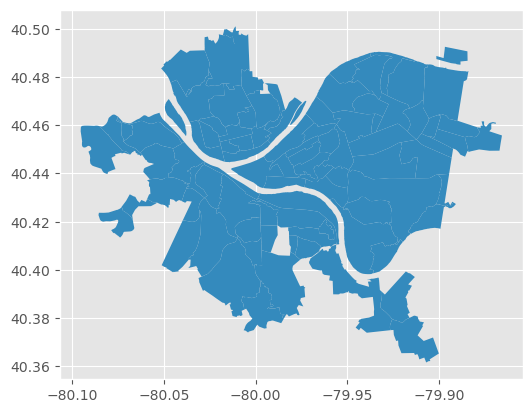

In [71]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe
plt.style.use('ggplot')
plt.show()

We will then merge this data with the plot of pittsburgh neighborhoods.

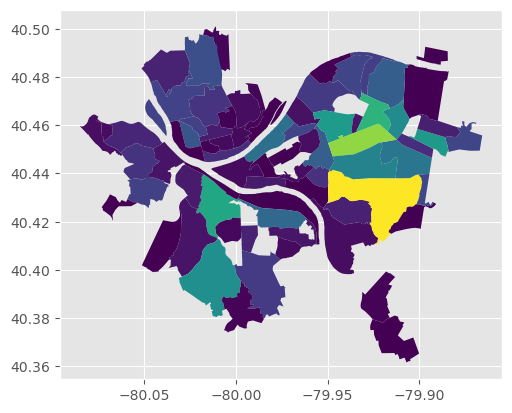

In [87]:
# do the merge
traffic_map = neighborhoods.merge(num_traffic, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
traffic_map[['hood','average_daily_car_traffic','geometry']].head()
traffic_map.plot(column='average_daily_car_traffic')
plt.show()

Then we plot the raw data for each area. This is not finalized since we have not yet accounted for the population in each area. 

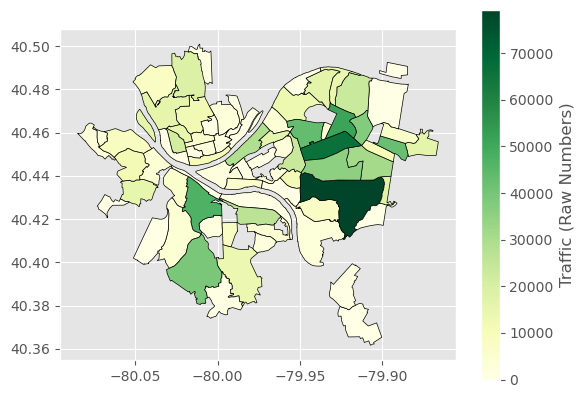

In [88]:
merge.plot(column='count', # set the data to be used for coloring
               cmap='YlGn',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Traffic (Raw Numbers)"}, # label the legend
                        # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

Here we are accounting for the population and then dividing count by population. This will be our "traffic per" data.

This is the plot of after accounting for population.

In [115]:
top = num_traffic.sort_values(ascending=True).head(60)
top

neighborhood
Middle Hill                      0.0
Crawford-Roberts                 0.0
South Oakland                    0.0
Banksville                       0.0
Upper Lawrenceville              0.0
Chateau                          0.0
Oakwood                          0.0
Troy Hill                        0.0
Swisshelm Park                   0.0
South Shore                      0.0
South Side Flats               115.0
Lincoln Place                  126.0
Lincoln-Lemington-Belmar       195.0
Fineview                       419.0
Allegheny West                 477.0
New Homestead                  666.0
Overbrook                      777.0
Summer Hill                    937.0
Spring Garden                 1226.0
Beltzhoover                   1577.0
East Allegheny                1924.0
Central Business District     2305.0
Allegheny Center              2386.0
St. Clair                     2436.0
Chartiers City                2571.0
Hazelwood                     2579.0
West Oakland             

Finally, we graphed the values of traffic count per population in a bar graph in ascending order. The lowest traffic is in crafton heights. 

In [124]:
top = num_traffic.sort_values(ascending=True).head(10)
top

neighborhood
Middle Hill            0.0
Crawford-Roberts       0.0
South Oakland          0.0
Banksville             0.0
Upper Lawrenceville    0.0
Chateau                0.0
Oakwood                0.0
Troy Hill              0.0
Swisshelm Park         0.0
South Shore            0.0
Name: average_daily_car_traffic, dtype: float64

**Based on the data, Middle Hill is the best area for traffic per population. However, my favorite neighborhood in Pittsburgh is probably Oakland since that is where Pitt is.**

## Metric #3: Crime

### Julian Reinstein

The WPRDC's report on crime lists every single crime committed individually. So, what I had to do was create a dictionary to store neighborhood names and the number of crimes committed within each neighborhood using a for-each loop.

In [25]:
crime = pd.read_csv("Crime.csv")

list = {}
for index, row in crime.iterrows():
    item = row["INCIDENTNEIGHBORHOOD"]
    if(item in list):
        list[item] += 1
    else:
        list[item] = 1
print(list)

{'Bloomfield': 984, 'Outside City': 316, 'Westwood': 226, 'East Allegheny': 2217, 'Crafton Heights': 601, 'Greenfield': 537, 'Brookline': 1390, 'Regent Square': 37, 'East Liberty': 1889, nan: 2489, 'East Hills': 1194, 'Carrick': 2352, 'Allegheny Center': 1244, 'South Side Flats': 3497, 'Sheraden': 1285, 'East Carnegie': 48, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 289, 'Perry South': 1057, 'Allentown': 947, 'North Shore': 814, 'Marshall-Shadeland': 1516, 'Central Oakland': 521, 'Middle Hill': 932, 'Strip District': 503, 'Lincoln-Lemington-Belmar': 1362, 'Central Northside': 23, 'Troy Hill-Herrs Island': 6, 'Highland Park': 558, 'Homewood North': 1969, 'Northview Heights': 713, 'Brighton Heights': 1114, 'Hazelwood': 1396, 'Perry North': 587, 'Bedford Dwellings': 665, 'Elliott': 663, 'Beechview': 1201, 'Fineview': 796, 'Glen Hazel': 169, 'Spring Hill-City View': 711, 'Bluff': 1502, 'Manchester': 471, 'Homewood West': 764, 'Outside County': 57, 'Point Breeze': 301, 'Homewo

In [118]:
num_crime = pd.Series(list)
print(num_crime.to_frame())

                    0
Bloomfield        984
Outside City      316
Westwood          226
East Allegheny   2217
Crafton Heights   601
...               ...
Ridgemont          37
Swisshelm Park     43
Hays              120
Chartiers City     46
Mt. Oliver Boro    18

[99 rows x 1 columns]


Cool. Now, let's merge the data with a map of Pittsburgh.

In [27]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot()
plt.style.use('ggplot')
merged = neighborhoods.merge(num_crime.rename("count"), left_on="hood", right_on=num_crime.index)

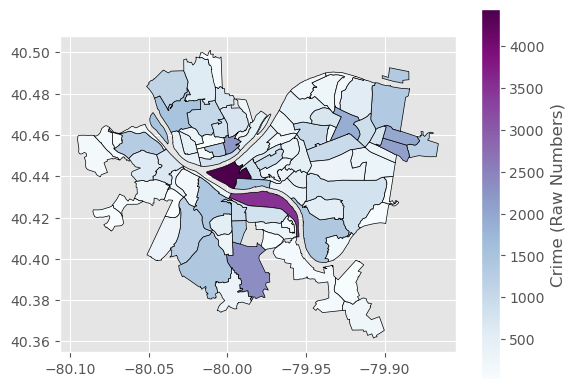

In [34]:
merged.plot(column='count', # set the data to be used for coloring
               cmap='BuPu',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Crime (Raw Numbers)"}, # label the legend
                        # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

This is great and all, but we have a problem: I want to know the crime rate mapped in terms of crime per population, not just the number of arrests in each area. To do this, I will need to divide every neighborhood arrest number by the total neighborhood population.

In [29]:
population = pd.read_csv("total-population.csv")[["Neighborhood", "Estimate; Total"]]
merged_2 = merged.merge(population, left_on="hood", right_on="Neighborhood")

In [30]:
merged_2["crime_per"] = merged_2["count"]/merged_2["Estimate; Total"] * 100
merged_2["crime_per"]

0       8.948815
1       4.738596
2      18.928363
3      37.707865
4      67.336011
         ...    
84     11.783439
85    123.404255
86     39.227895
87     23.603352
88     15.566163
Name: crime_per, Length: 89, dtype: float64

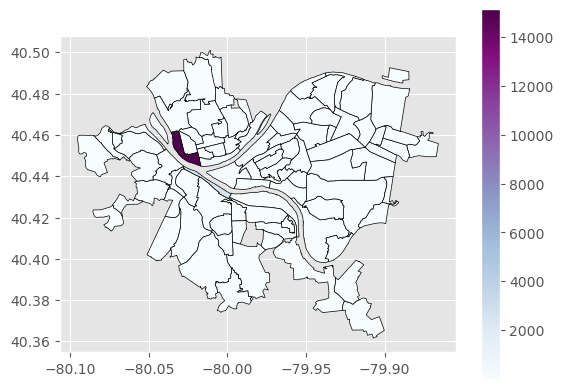

In [127]:
merged_2.plot(column="crime_per", cmap="BuPu", legend="true", edgecolor="black")
plt.show()

Oof. That doesn't look pretty. The colors look identical and the outliers, which represent the neighborhoods with the highest crime rates, stand out like a sore thumb. However, since we need the neighborhoods that have the lowest crime rates, we can throw the outliers (areas that have a crime rate greater than 100) out.

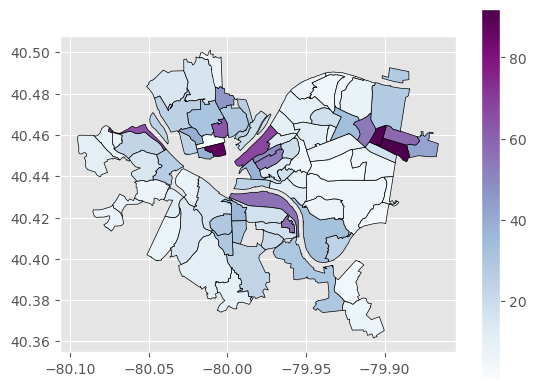

In [126]:
less_100 = merged_2["crime_per"] < 100
crime_query_mask = merged_2[less_100]
crime_query_mask.plot(column="crime_per", cmap="BuPu", legend="true", edgecolor="black")
plt.show()

Here are the neighborhoods with the lowest crime rate shown on a bar graph:

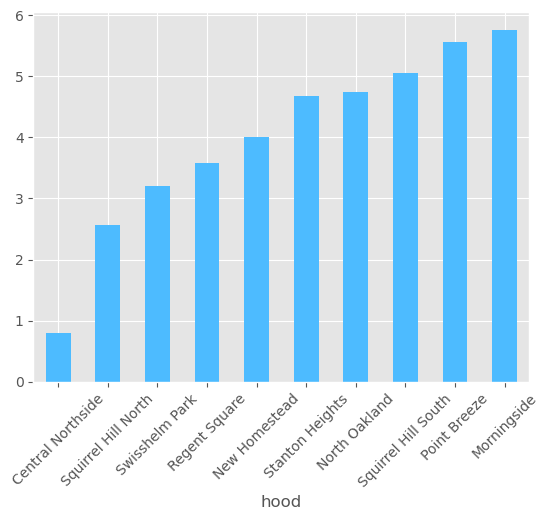

In [125]:
top = merged_2.sort_values(by="crime_per", ascending=True).head(10)
top.plot.bar(x="hood", y="crime_per", legend=False, rot=45, color="#4dbbff")
plt.show()

Based on my calculations, Central Northside is the best neighborhood in Pittsburgh in terms of crime rate!

My favorite neighborhood is the North Shore because that is where PNC Park and Acrisure Field are.

## Putting it All Together: Which Neighborhood is the "Happiest Neighborhood?"

So, now that we have the neighborhood rankings for parks, traffic, and crime, we can put them all together to see which neighborhood is the "Happiest."

First, for a neighborhood to qualify for the final rankings, a neighborhood must be in the top 60 neighborhoods in each of the three categories. The rankings between the three categories will be averaged (e.g. 1, 5, and 10), and the neighborhood with the lowest average ranking is the "Happiest Neighborhood!"

There is, however, one thing we changed: there was a 10-way tie for first for the traffic data, so if a neighborhood was in the top 10 for traffic, they get a ranking of 1.

![rankings](rankings.png)

Seeing as Upper Lawrenceville is at the top of the list, it is the "Happiest Neighborhood" in all of Pittsburgh!

![upper_lawrenceville](ul.png)